In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

TypeError: print_jpg() got an unexpected keyword argument 'quality'

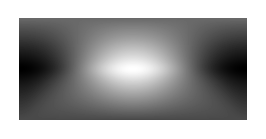

In [12]:
# Load data and create dataframe
phi = np.load("Phi_201snap.npy")
df = pd.DataFrame(index=np.arange(201))
my_dpi = 192

for i in range(201):
    arr = phi[:,:,i]

    # Create convert function to use to convert output_array back to raw values
    phimax, phimin = np.max(arr), np.min(arr)
    ratio = (phimax-phimin)/255
    def convertRGBToRaw(x):
        return ratio*x + phimin

    # Plot image (raw automatically converted to grayscale)
    plt.figure(figsize=(294/my_dpi, 165/my_dpi), dpi=my_dpi)
    plt.imshow(arr, cmap='gray')
    plt.axis("off")

    # Save as PNG & JPG of varying quality and open JPG's again to convert to np array
    plt.savefig('2.1.png', bbox_inches='tight', pad_inches=0)

    for q in [100, 75, 50, 25]:
        title = '2.1.' + str(q) + '.jpg'
        plt.savefig(title, bbox_inches='tight', pad_inches=0, dpi=(q*my_dpi/100))
        im = Image.open(title)
        im = im.resize((227, 101), Image.LANCZOS)
        output_array = np.asarray(im)
    
        # Loop through output_array and replace RGB by raw in copy
        copy = arr.copy()
        for row_index, row in enumerate(output_array):
            for col_index, col in enumerate(row):
                copy[row_index][col_index] = convertRGBToRaw(col[0])
    
        # Compute RMSE's and compression ratio and add to dataframe
        in_imsize = os.stat('2.1.png').st_size
        out_imsize = os.stat(title).st_size
        crcol = 'CR2.1.' + str(q)
        df.at[i, crcol] = in_imsize/out_imsize
        
        diff = copy - arr
        rmse = np.sqrt(np.mean(diff**2))
        rmsecol = 'RMSE2.1.' + str(q)
        df.at[i, rmsecol] = rmse
    plt.close()
    
df.to_pickle("analysis2.1.pkl")
df

# Potential problem: in the resizing line, this resizes the image after it's already saved, so out_imsize is still associated with the 
# smaller image (when we want it to be the same size image but with less quality) 

# So I think we should go back to working with im.save from the first analysis.ipynb? But need to make sure the computation doesn't take 
# too long.

In [54]:
df.isnull().sum().sum()

0

In [33]:
# Load data and create dataframe
phi = np.load("Phi_201snap.npy")
df2 = pd.DataFrame(columns=['CR2.1', 'RMSE2.1'], index=np.arange(201))
my_dpi = 100

for i in range(201):
    arr = phi[:,:,i]

    # Plot image (raw automatically converted to grayscale)
    plt.figure(figsize=(294/my_dpi, 165/my_dpi), dpi=my_dpi)
    plt.imshow(arr, cmap='gray')
    plt.axis("off")

    # Save as PNG & JPG and open JPG again to convert to np array
    plt.savefig('analysis2.1.png', bbox_inches='tight', pad_inches=0)
    plt.savefig('analysis2.1.jpg', bbox_inches='tight', pad_inches=0)
    plt.close()
    im = Image.open('analysis2.1.jpg')
    output_array = np.asarray(im)

    # Create convert function to use to convert output_array back to raw values
    phimax, phimin = np.max(arr), np.min(arr)
    ratio = (phimax-phimin)/255
    def convertRGBToRaw(x):
        return ratio*x + phimin

    # Loop through output_array and replace RGB by raw in copy
    copy = arr.copy()
    for row_index, row in enumerate(output_array):
        for col_index, col in enumerate(row):
            copy[row_index][col_index] = convertRGBToRaw(col[0])

    # Compute RMSE's and compression ratio and add to dataframe
    in_imsize = os.stat('analysis2.1.png').st_size
    out_imsize = os.stat('analysis2.1.jpg').st_size
    df2.at[i, 'CR2.1'] = in_imsize/out_imsize
    
    diff = copy - arr
    rmse = np.sqrt(np.mean(diff**2))
    df2.at[i, 'RMSE2.1'] = rmse
# df.to_pickle("analysis2.1.pkl")
df2

,CR2.1,RMSE2.1
0,4.148863,0.0
1,4.128169,0.0
2,3.985854,0.0
3,3.891004,0.0
4,3.999041,0.0
...,...,...
196,3.425889,0.009345
197,3.333994,0.010284
198,3.298053,0.011375
199,3.361852,0.012638


In [5]:
# Computing single norms without for loop
i = 0

my_dpi = 192
phi = np.load("Phi_201snap.npy")
arr = phi[:,:,i] 
plt.figure(figsize=(294/my_dpi, 165/my_dpi), dpi=my_dpi)
plt.imshow(arr, cmap='gray')
plt.axis("off")
plt.savefig('analysis2.1.jpg', bbox_inches='tight', pad_inches=0)
plt.close()
im = Image.open('analysis2.1.jpg')
output_array = np.asarray(im)
output_array
copy = arr.copy()
phimax, phimin = np.max(arr), np.min(arr)
ratio = (phimax-phimin)/255
def convertRGBToRaw(x):
    return ratio*x + phimin
for i, row in enumerate(output_array):
    for j, col in enumerate(row):
        copy[i][j] = convertRGBToRaw(col[0])
norm = np.linalg.norm(copy - arr)
norm

1.3469364304465263e-08